In [90]:
import numpy as np

In [91]:
x1 = np.arange(0, 100, 1.0)

In [92]:
x1[:10]

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [93]:
np.random.seed(0)

In [94]:
eps = np.random.randn(len(x1))/0.1
eps[:10]

array([17.64052346,  4.00157208,  9.78737984, 22.40893199, 18.6755799 ,
       -9.7727788 ,  9.50088418, -1.51357208, -1.03218852,  4.10598502])

In [95]:
a1 = 3.2
a0 = 0.4

In [96]:
np.dot(eps, eps)

10194.036179371045

In [97]:
y = a1 * x1 + a0 + eps

In [98]:
y[:10]

array([18.04052346,  7.60157208, 16.58737984, 32.40893199, 31.8755799 ,
        6.6272212 , 29.10088418, 21.28642792, 24.96781148, 33.30598502])

In [99]:
import matplotlib.pyplot as plt

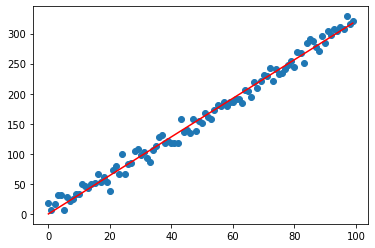

In [100]:
plt.scatter(x1, y)
plt.plot(x1, a1*x1 + a0, color='red')
plt.show()

In [101]:
a0, a1

(0.4, 3.2)

# use scikit learn

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
lr = LinearRegression()

In [104]:
lr.fit(x1.reshape(len(x1), -1), y)

LinearRegression()

In [105]:
lr.coef_, lr.intercept_

(array([3.16996698]), 2.4847144784220063)

In [106]:
a1, a0

(3.2, 0.4)

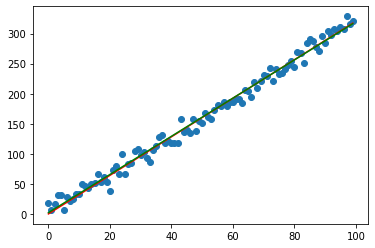

In [107]:
plt.scatter(x1, y)
plt.plot(x1, a1*x1 + a0, color='red')
plt.plot(x1, lr.coef_*x1 + lr.intercept_, color='green')
plt.show()

# recover without scikit learn

In [108]:
np.random.seed(3)

In [109]:
b0 = np.random.randn()
b0

1.7886284734303186

In [110]:
b1 = np.random.randn()
b1

0.43650985051198943

In [111]:
t_b = b1 * x1 + b0 - y
t_b[:10]

array([-16.25189499,  -5.37643376, -13.92573167, -29.31077397,
       -28.34091203,  -2.65604348, -24.6931966 , -16.44223049,
       -19.6871042 , -27.58876789])

In [112]:
t_a = a1 * x1 + a0 - y
t_a[:10]

array([-17.64052346,  -4.00157208,  -9.78737984, -22.40893199,
       -18.6755799 ,   9.7727788 ,  -9.50088418,   1.51357208,
         1.03218852,  -4.10598502])

In [113]:
loss_a = np.dot(t_a, t_a)
loss_a

10194.036179371045

In [114]:
loss_b = np.dot(t_b, t_b)
loss_b

2482330.0585765117

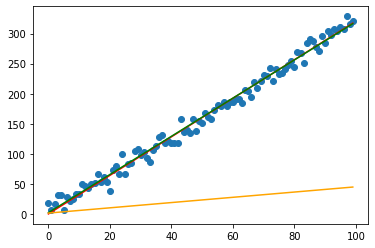

In [115]:
plt.scatter(x1, y)
plt.plot(x1, a1*x1 + a0, color='red')
plt.plot(x1, lr.coef_*x1 + lr.intercept_, color='green')
plt.plot(x1, b1*x1 + b0, color='orange')

In [116]:
def step(b1, b0, alpha):
    b1 += alpha * np.sum((y - b1*x1 - b0)*x1)/len(x1)
    b0 += alpha * np.sum((y - b1*x1 - b0)*1)/len(x1)

    plt.scatter(x1, y)
    plt.plot(x1, a1*x1 + a0, color='red')
    plt.plot(x1, lr.coef_*x1 + lr.intercept_, color='green')
    plt.plot(x1, b1*x1 + b0, color='orange')

    t_b = b1 * x1 + b0 - y
    loss_b = np.dot(t_b, t_b)
    return b1, b0, a1, a0, loss_b

2.723602297764678 1.8175328583998582 3.2 0.4 78496.82855558161


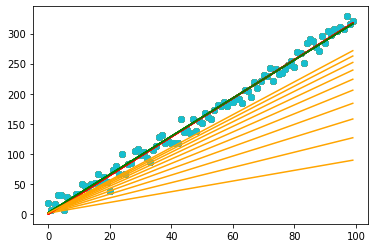

In [117]:
for i in range(10):
    b1, b0, *tmp = step(b1, b0, 5.0e-5)
print(b1, b0, *tmp)

3.163741922991142 1.8241183562376473 3.2 0.4 10180.182555311632


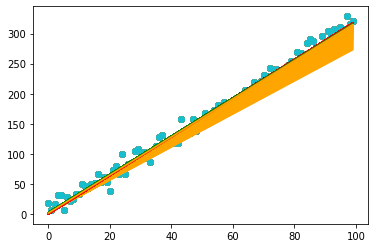

In [118]:
for i in range(100):
    b1, b0, *tmp = step(b1, b0, 1.0e-5)
print(b1, b0, *tmp)

3.1682776896379905 1.8242032728662867 3.2 0.4 10138.719451386307


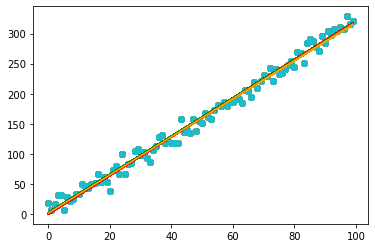

In [119]:
for i in range(100):
    b1, b0, *tmp = step(b1, b0, 1.0e-6)
print(b1, b0, *tmp)